In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the training dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Load the validation dataset
val_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [12]:
len(train_dataset), len(val_dataset)

(60000, 10000)

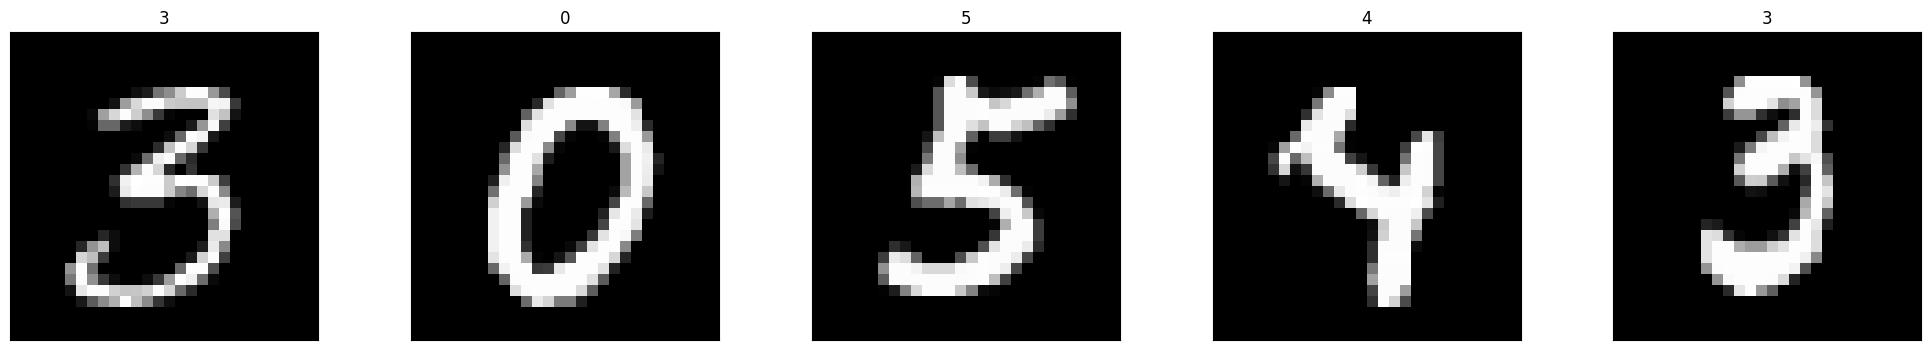

In [3]:
# Show the first 5 images with their labels
images, labels = next(iter(train_loader))

fig = plt.figure(figsize=(25, 4))
for idx in range(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx].squeeze(), cmap='gray')
    ax.set_title(str(labels[idx].item()))

In [4]:
# Define the CNN model
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # First conv layer
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        # Second conv layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # Max pooling
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Flatten layer
        self.flatten = nn.Flatten()
        # Linear layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        # Dropout
        self.dropout = nn.Dropout(0.3)
        # ReLU
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x))) # Convolution 1 and pooling
        x = self.pool(self.relu(self.conv2(x))) # Convolution 2 and pooling
        x = self.flatten(x) # Flatten the output for the linear layers
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = Net()

# Initialize the optimizer
optimizer = optim.AdamW(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

In [5]:
# Train the network
num_epochs = 20
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        # Forward pass, backward pass, optimize
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        # Calculate metrics
        running_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        
    # Print metrics for each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {(100*correct/total):.2f}%')

Epoch [1/20], Loss: 0.2269, Accuracy: 92.81%
Epoch [2/20], Loss: 0.0670, Accuracy: 97.97%
Epoch [3/20], Loss: 0.0507, Accuracy: 98.47%
Epoch [4/20], Loss: 0.0400, Accuracy: 98.82%
Epoch [5/20], Loss: 0.0331, Accuracy: 98.92%
Epoch [6/20], Loss: 0.0292, Accuracy: 99.09%
Epoch [7/20], Loss: 0.0252, Accuracy: 99.25%
Epoch [8/20], Loss: 0.0223, Accuracy: 99.28%
Epoch [9/20], Loss: 0.0201, Accuracy: 99.36%
Epoch [10/20], Loss: 0.0186, Accuracy: 99.39%
Epoch [11/20], Loss: 0.0151, Accuracy: 99.50%
Epoch [12/20], Loss: 0.0142, Accuracy: 99.54%
Epoch [13/20], Loss: 0.0132, Accuracy: 99.59%
Epoch [14/20], Loss: 0.0121, Accuracy: 99.59%
Epoch [15/20], Loss: 0.0110, Accuracy: 99.64%
Epoch [16/20], Loss: 0.0113, Accuracy: 99.65%
Epoch [17/20], Loss: 0.0101, Accuracy: 99.68%
Epoch [18/20], Loss: 0.0107, Accuracy: 99.65%
Epoch [19/20], Loss: 0.0115, Accuracy: 99.64%
Epoch [20/20], Loss: 0.0087, Accuracy: 99.74%


In [7]:
# Save the model
torch.save(model.state_dict(), './models/mnist_cnn.pt')

In [8]:
# Evaluate the model on the validation dataset
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data, target in val_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on validation data: {accuracy:.2f}%')

Accuracy on validation data: 99.24%


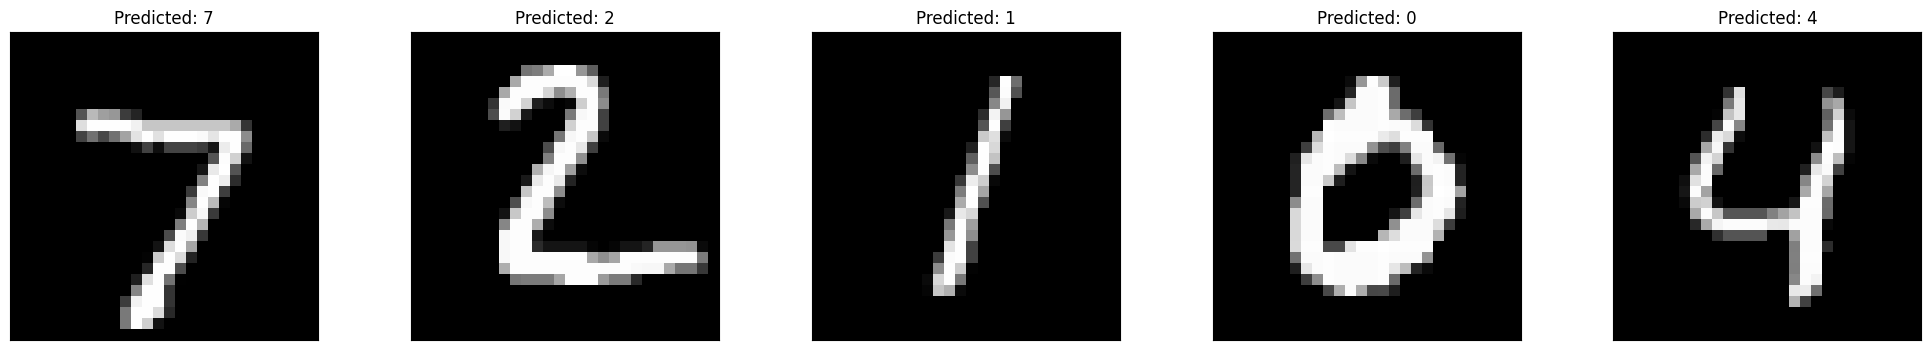

In [11]:
# Get a batch of images from the validation dataset
images, labels = next(iter(val_loader))

# Make predictions on the batch of images
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Plot the images with their predicted labels
fig = plt.figure(figsize=(25, 4))
for idx in range(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx].squeeze(), cmap='gray')
    ax.set_title(f'Predicted: {predicted[idx].item()}')